In [31]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os 
import pandas as pd
import pdb
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10,10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large', 
         'font.size': 20,
         'lines.linewidth': 4}
pylab.rcParams.update(params)
#Define Computer
Malphigui=0
if Malphigui:
    directory='/home/pdavid/Bureau/Hybrid_2D_beta/Code' #Malpighi
    directory_script='/home/pdavid/Bureau/Hybrid_2D_beta/Figures_and_Tests/Double_source'
    directory_article_figures='/home/pdavid/Bureau/Hybrid_2D_beta/Figures_and_Tests/Article_figs'
else: #Auto_58
    directory='/home/pdavid/Bureau/Code/Updated_BCs_2/Code/'
    directory_script='/home/pdavid/Bureau/Code/Updated_BCs_2/Figures_and_Tests/Double_source'
    directory_article_figures='/home/pdavid/Bureau/Code/Hybrid_2D_beta/Figures_and_Tests/Article_figs'
    
os.chdir(directory)
csv_directory=directory_script+'/csv_outputs'
from Testing import extract_COMSOL_data, save_csv

COMSOL_both_sources=directory_script + '/COMSOL_output/both_sources'
COMSOL_source_sink=directory_script + '/COMSOL_output/source_sink'


alpha,L=np.squeeze(np.array(pd.read_csv(csv_directory + '/alpha_L.csv').to_numpy()).astype(int))
array_of_dist=np.squeeze(np.array(pd.read_csv(csv_directory + '/array_of_dist.csv').to_numpy()).astype(int))*L/alpha

    Both sources, different radius, small neighbourhood

In [32]:
dir_sim=csv_directory + '/both_sources/small'

q_FEM_both_sources_small=np.zeros((0,2))

for d in array_of_dist:
    current=COMSOL_both_sources+'/d={}'.format(int(d*alpha/L))
    #print(os.path.exists(COMSOL_both+'/d={}'.format(d)))
    q_d=pd.read_fwf(current + '/q.txt').columns.to_numpy().astype(float)
    q_FEM_both_sources_small=np.concatenate((q_FEM_both_sources_small, [q_d]))
    

    
    

In [33]:
dir_sim=csv_directory + '/both_sources/big'

q_FEM_both_sources_big=np.zeros((0,2))

for d in array_of_dist:
    current=COMSOL_both_sources+'/d={}'.format(int(d*alpha/L))
    #print(os.path.exists(COMSOL_both+'/d={}'.format(d*alpha/L)))
    q_d=pd.read_fwf(current + '/q.txt').columns.to_numpy().astype(float)
    q_FEM_both_sources_big=np.concatenate((q_FEM_both_sources_big, [q_d]))

dir_sim=csv_directory + '/source_sink/small'

q_FEM_source_sink_small=np.zeros((0,2))

for d in array_of_dist:
    current=COMSOL_source_sink+'/d={}'.format(d*alpha/L)
    #print(os.path.exists(COMSOL_source_sink+'/d={}'.format(d*alpha/L)))
    q_d=pd.read_fwf(current + '/q.txt').columns.to_numpy().astype(float)
    q_FEM_source_sink_small=np.concatenate((q_FEM_source_sink_small, [q_d]))m 
    

dir_sim=csv_directory + '/source_sink/big'

q_FEM_source_sink_big=np.zeros((0,2))

for d in array_of_dist:
    current=COMSOL_source_sink+'/d={}'.format(d*alpha/L)
    #print(os.path.exists(COMSOL_source_sink+'/d={}'.format(d*alpha/L)))
    q_d=pd.read_fwf(current + '/q.txt').columns.to_numpy().astype(float)
    q_FEM_source_sink_big=np.concatenate((q_FEM_source_sink_big, [q_d]))

In [34]:
dir_sim=csv_directory + '/source_sink/small'

q_Multi=pd.read_csv(dir_sim + '/q_Multi.csv').to_numpy()
q_FV=pd.read_csv(dir_sim + '/q_FV.csv').to_numpy()
q_FEM=pd.read_csv(dir_sim + '/q_FEM.csv').to_numpy()

err_q_Multi_small=np.abs((q_Multi-q_FEM)/q_FEM)
err_q_FV=np.abs((q_FV-q_FEM)/q_FEM)

save_csv(dir_sim + '/err_q_Multi_small_source_sink.csv', ['small', 'big'], err_q_Multi_small.T)
save_csv(dir_sim + '/err_q_FV_source_sink', ['small', 'big'], err_q_FV.T)

,small,big
0,0.071822,0.110240
1,0.153340,0.138238
2,0.216893,0.158257
3,0.312941,0.185074
4,0.385315,0.202784
5,0.443832,0.215698
6,0.535646,0.233704
7,0.606131,0.245877
8,0.033533,0.090507
9,0.048396,0.093564


Text(0, 0.5, 'relative flux error')

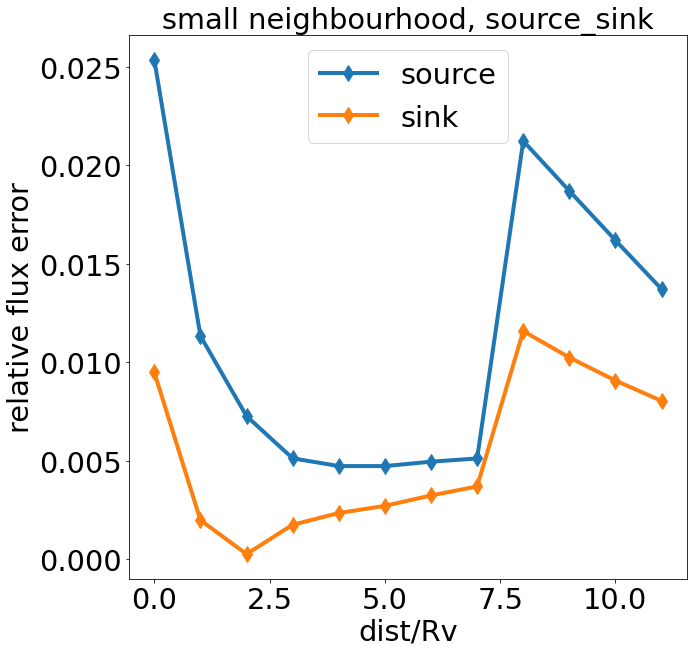

In [35]:
plt.plot(err_q_Multi_small[:,0], '-d',markersize=12,label='source')
plt.plot(err_q_Multi_small[:,1], '-d',markersize=12, label='sink')
plt.title('small neighbourhood, source_sink')
plt.legend()
plt.xlabel('dist/Rv')
plt.ylabel('relative flux error')

In [36]:
dir_sim=csv_directory + '/source_sink/big'

q_Multi=pd.read_csv(dir_sim + '/q_Multi.csv').to_numpy()
q_FV=pd.read_csv(dir_sim + '/q_Multi.csv').to_numpy()
q_FEM=pd.read_csv(dir_sim + '/q_FEM.csv').to_numpy()

err_q_Multi_big=np.abs((q_Multi-q_FEM)/q_FEM)

save_csv(dir_sim + '/err_q_Multi_big_source_sink.csv', ['small', 'big'], err_q_Multi_small.T)


,small,big
0,0.025361,0.009483
1,0.011327,0.001968
2,0.007255,0.000243
3,0.005110,0.001736
4,0.004717,0.002329
5,0.004717,0.002694
6,0.004939,0.003223
7,0.005104,0.003681
8,0.021240,0.011578
9,0.018702,0.010234


Text(0, 0.5, 'relative flux error')

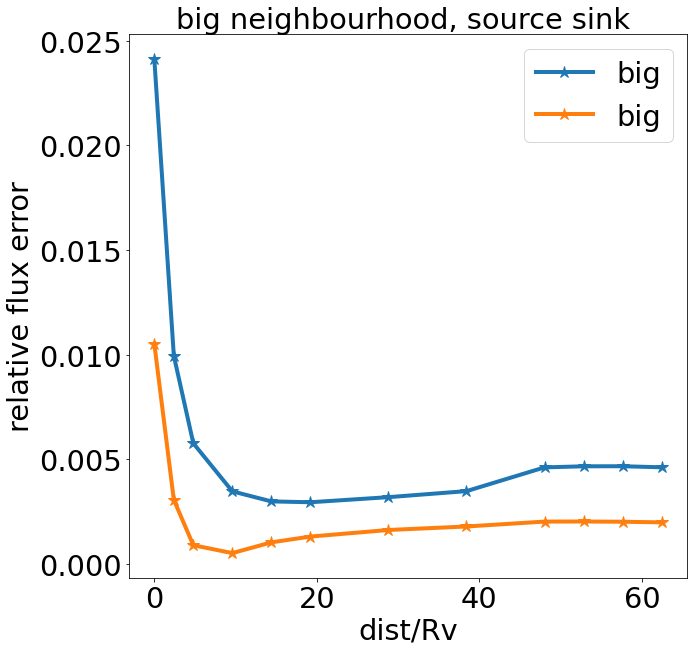

In [37]:
plt.plot(array_of_dist,err_q_Multi_big[:,0], '-*', markersize=12,label='big')
plt.plot(array_of_dist,err_q_Multi_big[:,1], '-*', markersize=12, label='big')
plt.title('big neighbourhood, source sink ')
plt.legend()
plt.xlabel('dist/Rv')
plt.ylabel('relative flux error')

In [38]:
os.path.exists(directory_article_figures+'/Double_source')

False

Text(0, 0.5, 'relative flux error')

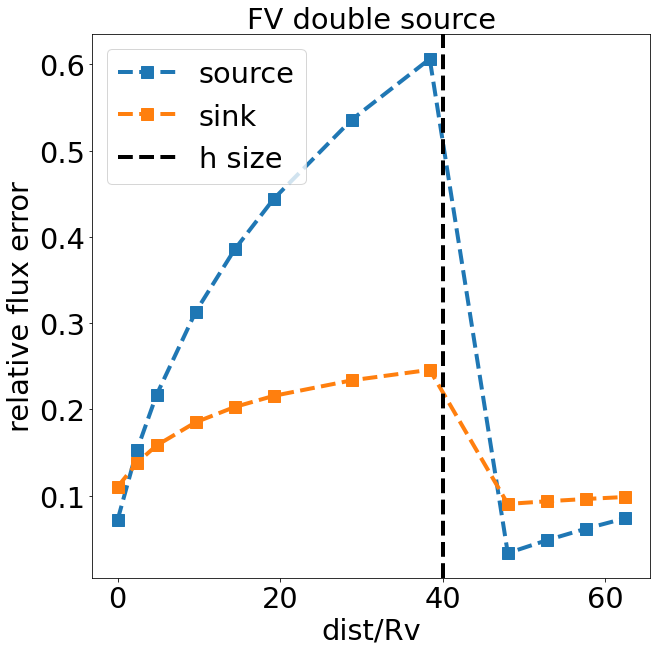

In [40]:
plt.plot(array_of_dist,err_q_FV[:,0], '--s', markersize=12,label='source')
plt.plot(array_of_dist,err_q_FV[:,1], '--s', markersize=12, label='sink')
plt.axvline(x=40, color='k', linestyle='--', label='h size')
plt.title('FV double source')
plt.legend()
plt.xlabel('dist/Rv')
plt.ylabel('relative flux error')
#plt.savefig(directory_article_figures + '/Double_source/FV_errors.pdf')

Text(0, 0.5, 'relative flux error')

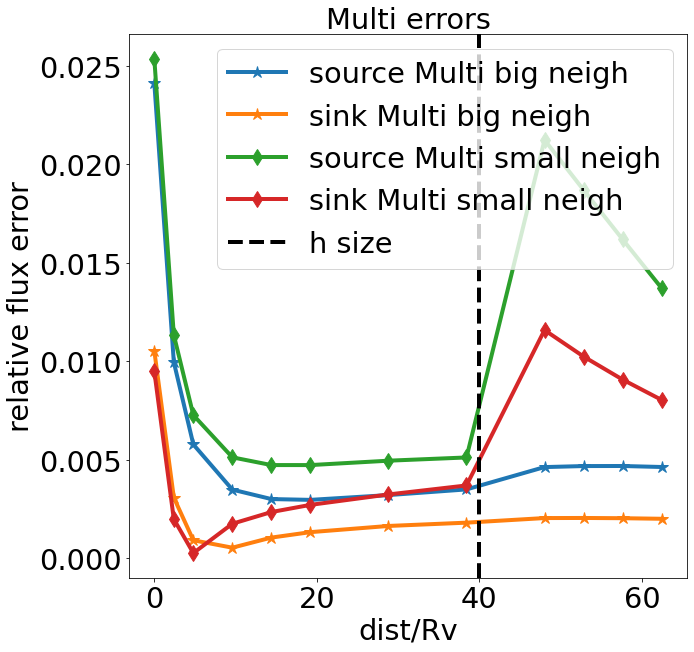

In [42]:
plt.plot(array_of_dist,err_q_Multi_big[:,0], '-*', markersize=12,label='source Multi big neigh')
plt.plot(array_of_dist,err_q_Multi_big[:,1], '-*', markersize=12, label='sink Multi big neigh')
plt.plot(array_of_dist,err_q_Multi_small[:,0], '-d',markersize=12,label='source Multi small neigh')
plt.plot(array_of_dist,err_q_Multi_small[:,1], '-d',markersize=12, label='sink Multi small neigh')
plt.axvline(x=40, color='k', linestyle='--', label='h size')
plt.title('Multi errors')
plt.legend()
plt.xlabel('dist/Rv')
plt.ylabel('relative flux error')
#plt.savefig(directory_article_figures + '/Double_source/Multi_errors.pdf')

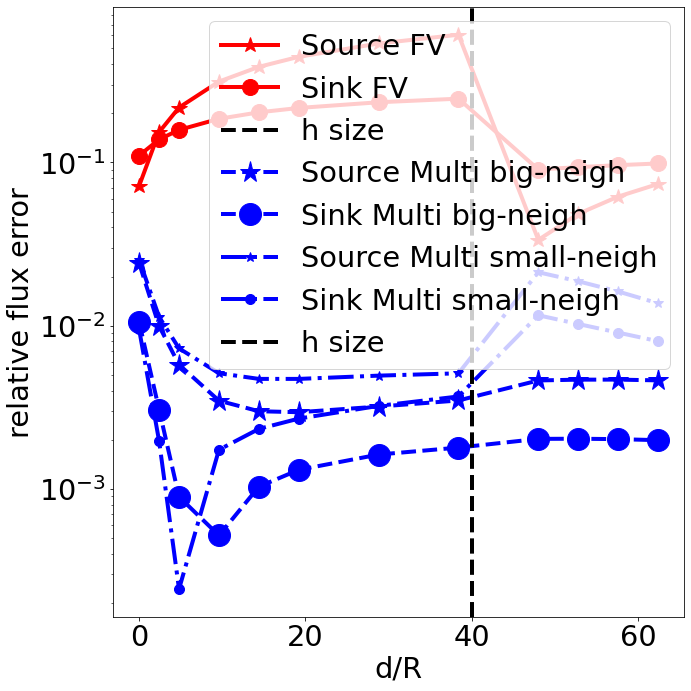

In [43]:
plt.plot(array_of_dist,err_q_FV[:,0], '-*', color='r', markersize=16,label='Source FV')
plt.plot(array_of_dist,err_q_FV[:,1], '-o', color='r', markersize=16, label='Sink FV')
plt.axvline(x=40, color='k', linestyle='--', label='h size')
plt.plot(array_of_dist,err_q_Multi_big[:,0], '--*', color='b', markersize=22,label='Source Multi big-neigh')
plt.plot(array_of_dist,err_q_Multi_big[:,1], '--o', color='b', markersize=22, label='Sink Multi big-neigh')
plt.plot(array_of_dist,err_q_Multi_small[:,0], '-.*', color='b',markersize=10,label='Source Multi small-neigh')
plt.plot(array_of_dist,err_q_Multi_small[:,1], '-.o',color='b',markersize=10, label='Sink Multi small-neigh')
plt.axvline(x=40, color='k', linestyle='--', label='h size')
plt.legend()
plt.xlabel('d/R')
plt.ylabel('relative flux error')
plt.yscale('log')
plt.tight_layout()
#plt.savefig(directory_article_figures + '/Double_source/All_errs.pdf')